**The steps we will follow in the exercise as follows:**

1. Reading and Understanding the Data.
2. Visualising Data for better insights.
3. Preparing the Data for modelling (Train-Test split, Rescaling)
4. Training the model.
5. Performing Residual Analysis
6. Prediction and evaluation on Test Data set

**THe dataset contains following features-**

   - datetime ---> hourly date + timestamp
   - season ---> 1 = spring, 2 = summer, 3 = fall, 4 = winter
   - holiday ---> whether the day is considered a holiday
   - workingday ---> whether the day is neither a weekend nor holiday
   - weather:
             1: Clear, Few clouds, Partly cloudy, Partly cloudy 
             2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
             3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
             4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
   - temp ---> temperature in Celsius
   - atemp ---> “feels like” temperature in Celsius
   - humidity ---> relative humidity
   - windspeed ---> wind speed
   - casual ---> number of non-registered user rentals initiated
   - registered ---> number of registered user rentals initiated
   - count ---> number of total rentals

<font color = red> **We are trying to predict count variable i.e. number of total rentals which will be behaving as a dependent variable for our analysis.**</font>

### <font color = blue> 1. Reading and understanding the data:</font>

**Importing important libraries to read bike rental data set.**

In [1]:
### Import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing Important Libraries

import numpy as np
import pandas as pd

In [3]:
### Reading Data set

df_bike = pd.read_csv('day.csv')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df_bike.shape

(730, 16)

In [5]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
### Checking null values

df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**NO MISSING VALUES IN DATASET**

In [7]:
### Rename the columns name for better understanding:

df_bike.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'count', 'dteday':'date'}, inplace=True)
df_bike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
### Mapping variables in categorical variables:

df_bike['season'] = df_bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
df_bike['month'] = df_bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_bike['weathersit'] = df_bike.weathersit.map({1: 'Clear',2:'Cloudy',3:'Light Snow',4:'Snow + Fog'})
df_bike['weekday'] = df_bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df_bike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <font color=blue> 2. Data Visualisation: </font>

In [9]:
### Importing Visulaisation Libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

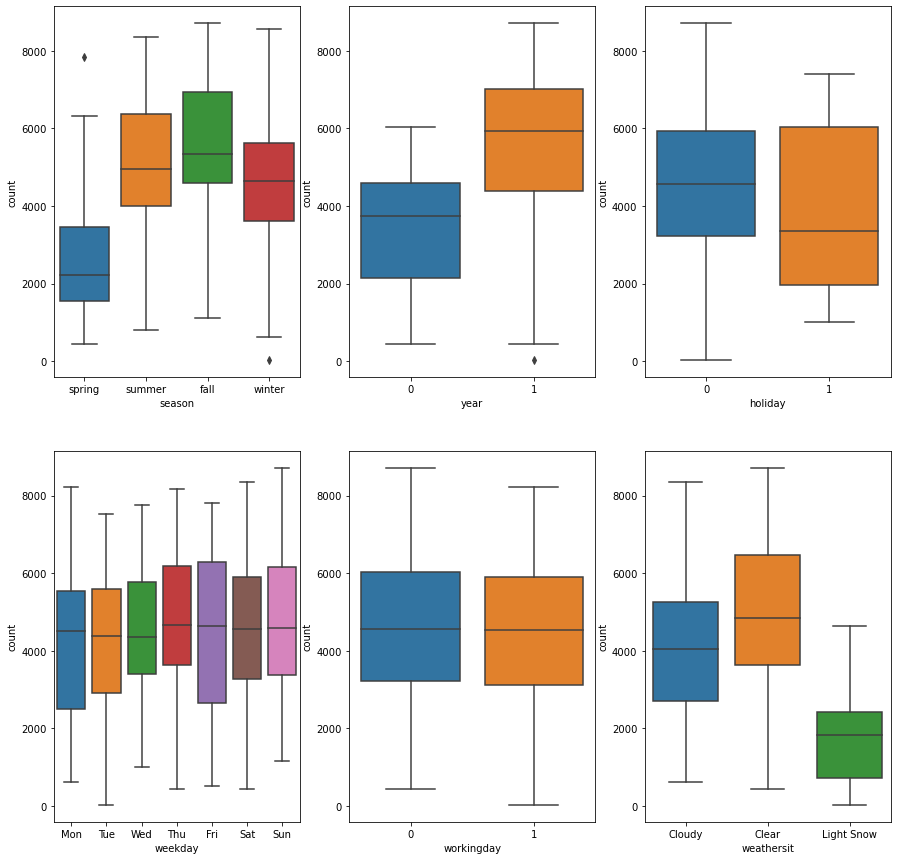

In [10]:
### Visualising the categorical variables:

plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='count', data=df_bike)
plt.subplot(2,3,2)
sns.boxplot(x='year', y='count', data=df_bike)
plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='count', data=df_bike)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='count', data=df_bike)
plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='count', data=df_bike)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='count', data=df_bike)

plt.show()

**NOTE:**  DATA IS FREE OF OUTLIERS IN ALL CATEGORICAL VARIABLES

**INSIGHTS:**
 The plots above shows the relationship between categorical variables and a Target variable.
 
   - Bike Rentals are more during the Fall season as compared to summer
   - Bike rentals are more in the year 2019 compared to 2018
   - Bike Rentals are more in clear weather
   - Bike rentals are more in non holiday days.

<Figure size 1080x1080 with 0 Axes>

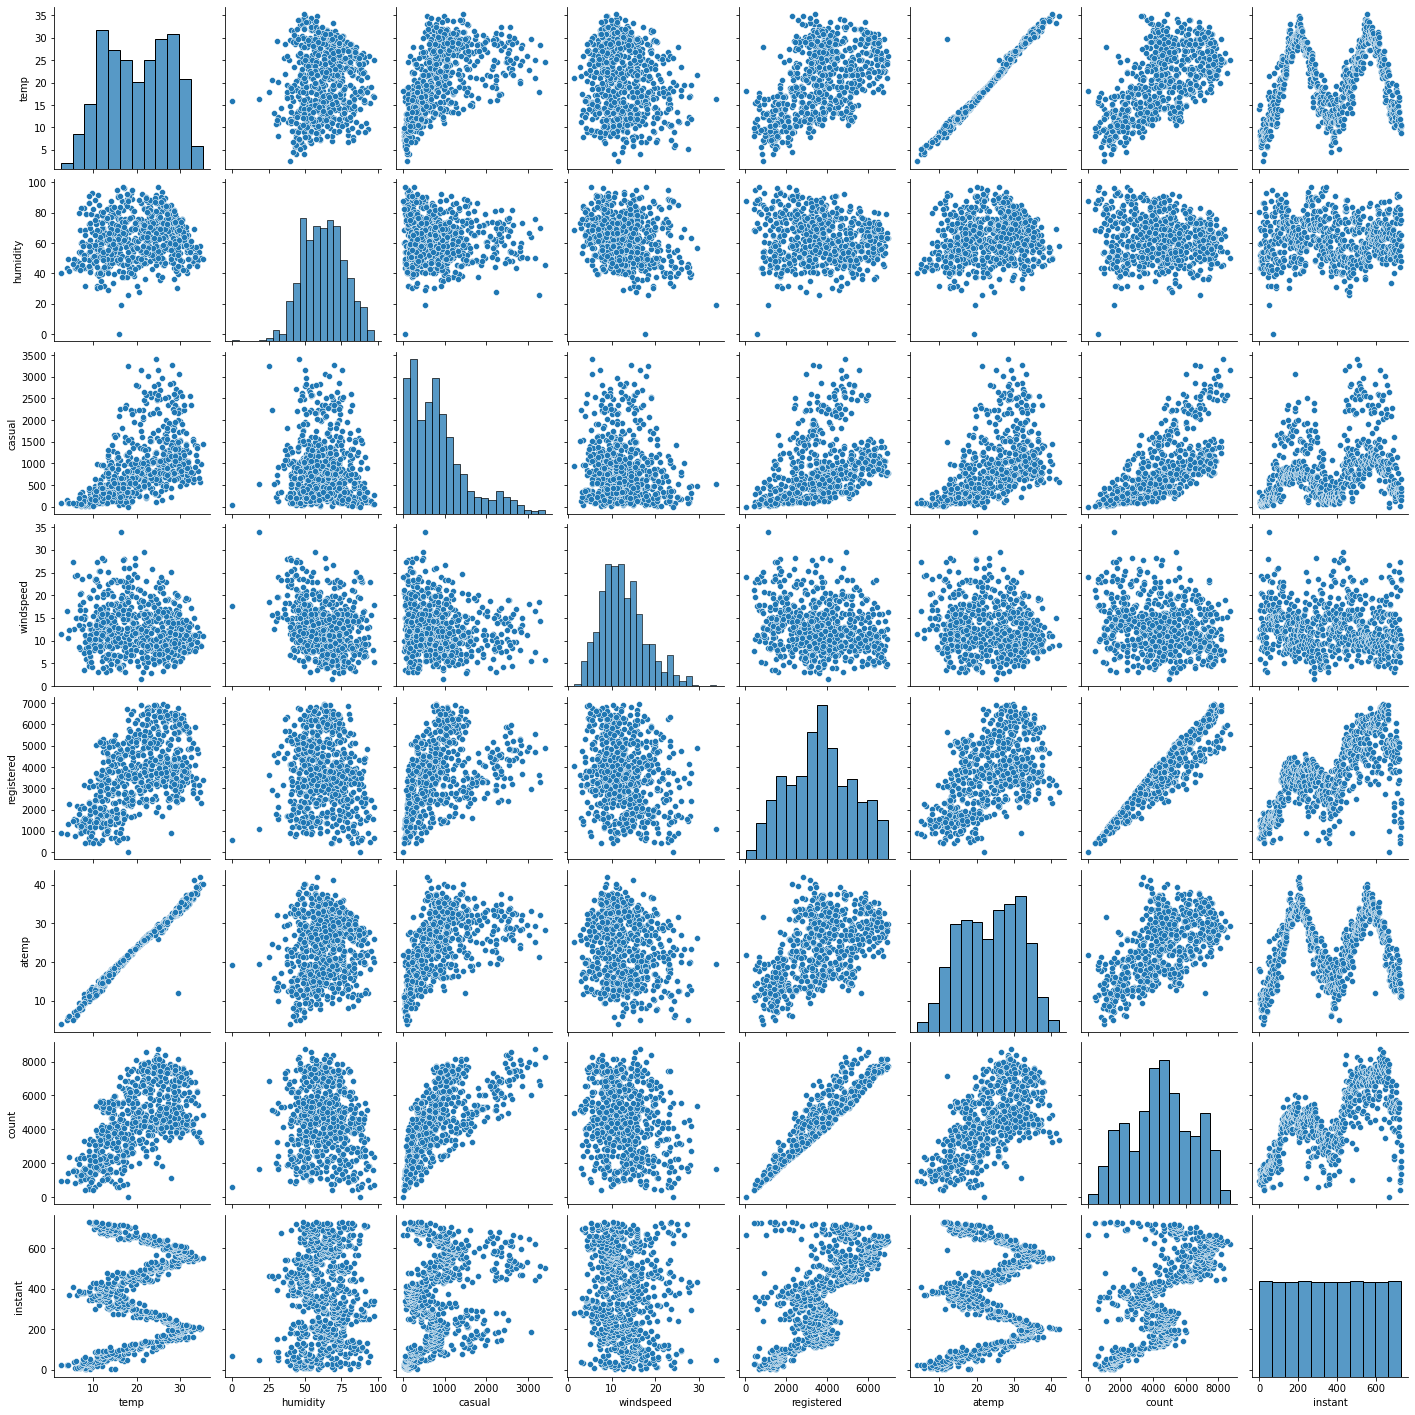

In [11]:
### Visualising the numerical variables in pairplot:

plt.figure(figsize=(15,15))
sns.pairplot(df_bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

**IMPORTANT POINTS:**
   - With Increase in temp variable there is increase in bike demand
   - windspeed and humidity are seems to be correlated with dependant variable i.e: count 
    

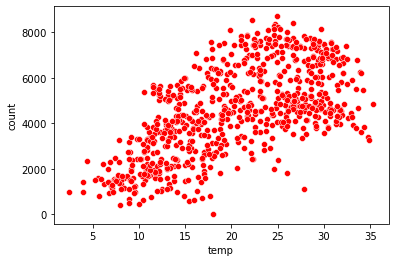

In [12]:
### Scatter plot for Temp & Count variable:

sns.scatterplot(x='temp', y='count', data=df_bike, color='red')
plt.show()

**Note: High Bikes Rentals are observed in higher temperature**

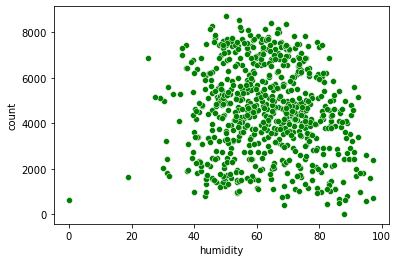

In [13]:
### Scatter plot for Humidity & count variable:

sns.scatterplot(x='humidity', y='count', data=df_bike, color='green')
plt.show()

**Note: Bike rentals more at high humidity**

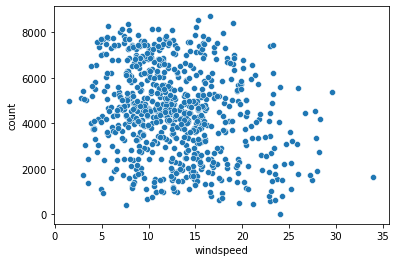

In [14]:
### Scatter plot for windspeed & count variable:

sns.scatterplot(x='windspeed', y='count', data=df_bike)
plt.show()

**Note: With some extent there is increase in bike rental with increase in windspeed**

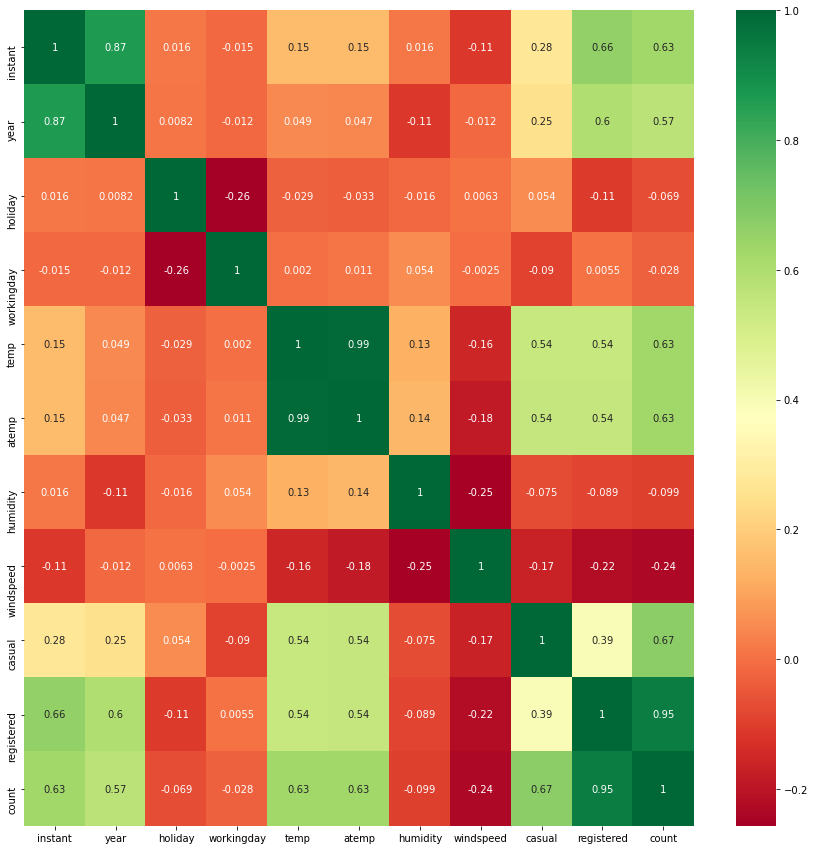

In [15]:
### Heatmap to check correation between variables:

plt.figure(figsize=(15,15))
sns.heatmap(df_bike.corr(), annot=True, cmap='RdYlGn')
plt.show()

From above pairplot and heatmap:
   - temp, atemp are highly correlated with dependent variable.
   - casual, registered are mostly correlated.
   - we can also see some other variables are most correlated with dependent variables.
   - Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model

#### <font color = red> So, Yes we can consider a Linear Regression Model. </font>

### <font color=blue> 3. Data Preparation for Model Building:  </font>

**We can see the dataset has some variables that are not required. We can drop instant, date, atemp, casual & registered**

In [16]:
### Dropping redundant variables:

df_bike = df_bike.drop(['instant', 'date', 'atemp', 'casual', 'registered'], axis=1)
df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [17]:
### Check the datatypes of all columns:

df_bike.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

#### <font color = blue> Dummy Variables:</font>

In [18]:
### Creating Dummy variables for categorical variables i.e: season,month,weekday,weathersit

seasons = pd.get_dummies(df_bike.season, drop_first=True)
months = pd.get_dummies(df_bike.month, drop_first=True)
weekdays = pd.get_dummies(df_bike.weekday, drop_first=True)
weather_sit = pd.get_dummies(df_bike.weathersit, drop_first=True)

In [19]:
### Adding dummy variables to data set:

df_bike = pd.concat([seasons, months, weekdays, weather_sit, df_bike], axis=1)

In [20]:
### Dropping variables because we created dummy variables for that categorical variables:

df_bike = df_bike.drop(['season', 'month', 'weekday', 'weathersit'], axis=1)

In [21]:
df_bike.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Cloudy,Light Snow,year,holiday,workingday,temp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [22]:
df_bike.shape

(730, 29)

#### <font color=blue> Train Test split: </font>

In [23]:
### Importing libraries for train test data:

import sklearn
from sklearn.model_selection import train_test_split

In [24]:
### Creating Train Test split:

df_train, df_test = train_test_split(df_bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


#### <font color=blue> Rescaling the features: </font>
    - It is important to rescale all features on the same scale for the model to easy interpretable.
    - We can use MinMax scale for rescaling to obtain all coffecients on the same scale.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

### Creating a list of numeric variables:

num_var = ['temp','humidity','windspeed','count']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

df_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Cloudy,Light Snow,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


**NOTE:** All features are rescaled between 0 and 1 by use of MinMax Scaler (normalization)

### <font color=blue> 4. Training the Model: </font>

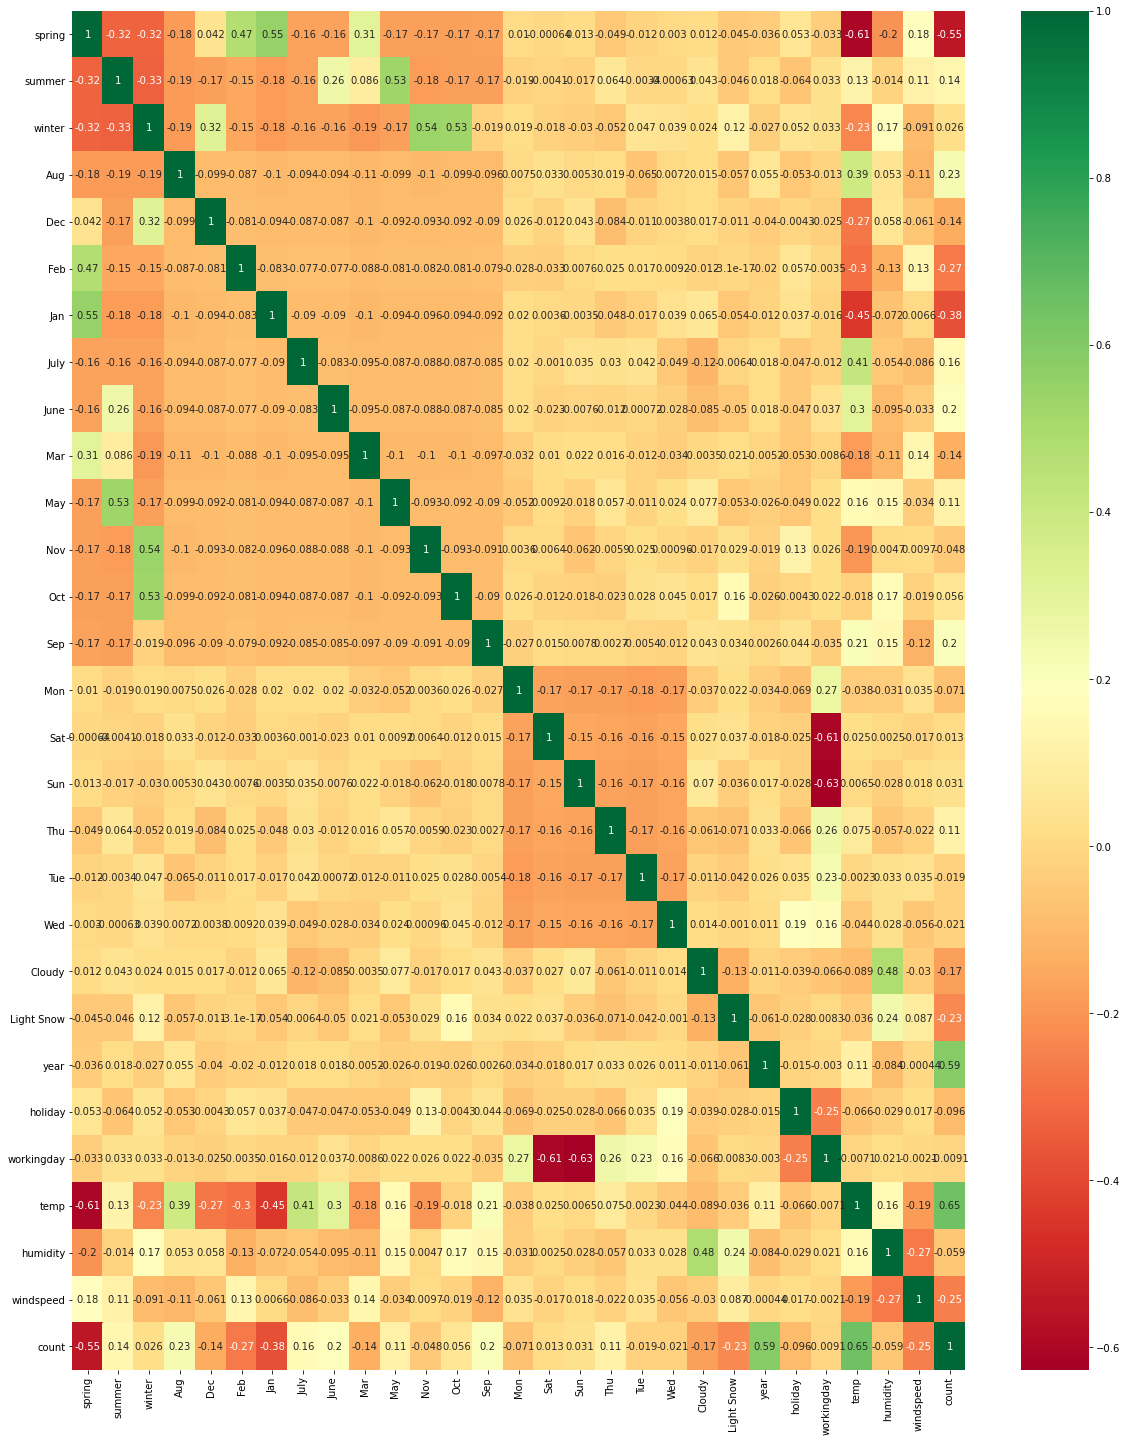

In [27]:
### Checking correlation between variables in df_train:

plt.figure(figsize=(20,25))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

**SO HERE WE CONCLUDE THAT YEAR, TEMP, AND SUMMER SEASON SEEMS TO BE GOOD INFLUENCER ON COUNT OF RENTAL BIKES**

In [28]:
y_train = df_train.pop('count')
X_train = df_train

#### <font color=blue> Building a Linear Model: </font>

**We will be using Linear Regression function from scikit learn.**

In [29]:
### Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
### running RFE with ouput number of variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [31]:
###list of variables selected

list(zip(X_train, rfe.support_, rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Cloudy', True, 1),
 ('Light Snow', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [32]:
### Columns where RFE suport is True

col = X_train.columns[rfe.support_]
col

Index(['spring', 'summer', 'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep',
       'Cloudy', 'Light Snow', 'year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [33]:
### columns where RFE support is false

X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

#### <font color=blue> Building model using statsmodels for detailed statistics parameter: </font>

In [34]:
### creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [35]:
### Adding a constant variables

import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
### Running the linear model

lm = sm.OLS(y_train, X_train_rfe).fit()

In [37]:
### Summary of Linear Model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        17:55:43   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

#### <font color=blue> Checking V.I.F </font>

VIF or variance Inflation factor describes the feature correlation with other variables which is extremely important parameter to check linear model

In [38]:
#Drop the constant term

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
0,spring,4.37
2,winter,4.06
1,summer,2.82
8,Cloudy,2.32
10,year,2.09
6,Nov,1.85
4,Jan,1.75


**From here we have to consider the VIF value and P value**
   - WE COULD HAVE FOLLOWING THREE CASES:
            1. High P-value, High VIF
            2. (a) High P-value, low VIF (remove these first)
               (b) Low P-Value, High VIF (remove these after)
            3. Low P-value, Low VIF

**December is insignificant in presence of other variables due to high p-value and low VIF; can be dropped**

In [40]:
X_train_1 = X_train_rfe.drop(['Dec'], axis=1)

In [41]:
### Building Second Linear Model without dec variable

X_train_lm1 = sm.add_constant(X_train_1)

lm_1 = sm.OLS(y_train, X_train_lm1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.41e-189
Time:                        17:55:44   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3032      0.035      8.598      0.0

In [42]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [43]:
### Calculating VIF for new model

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.09
11,temp,16.80
13,windspeed,4.72
0,spring,4.37
2,winter,3.78
1,summer,2.80
7,Cloudy,2.29
9,year,2.09
3,Jan,1.67
5,Nov,1.60


**'humidity' variable can be dropped as its insignificant by looking at very high VIF**

In [44]:
X_train_2 = X_train_lm1.drop(["humidity"], axis = 1)

In [45]:
### Building Third Linear Model without humidity variable

X_train_lm2 = sm.add_constant(X_train_2)

lm_2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.93e-186
Time:                        17:55:44   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2208      0.031      7.190      0.0

In [46]:
#Drop the constant

X_train_lm2 = X_train_lm2.drop(['const'],axis=1)

In [47]:
### Calculating VIF for new model

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.15
12,windspeed,4.67
0,spring,2.76
2,winter,2.28
1,summer,2.24
9,year,2.07
3,Jan,1.61
5,Nov,1.60
4,July,1.59
7,Cloudy,1.56


**November variable seems to be insignificant, by looking at p value and low VIF. We can drop it**

In [48]:
X_train_3 = X_train_lm2.drop(["Nov"], axis = 1)

In [49]:
### Building fourth Linear Model without Nov variable

X_train_lm3 = sm.add_constant(X_train_3)

lm_3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.14e-187
Time:                        17:55:44   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [50]:
X_train_lm3 = X_train_lm3.drop(['const'],axis=1)

In [51]:
### Calculating VIF for new model

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.62
0,spring,2.75
1,summer,2.24
8,year,2.07
2,winter,1.78
3,Jan,1.61
4,July,1.59
6,Cloudy,1.56
5,Sep,1.34


**january variable seems to be insignificant, by looking at p value and low VIF. We can drop it**

In [52]:
X_train_4 = X_train_lm3.drop(["Jan"], axis = 1)

In [53]:
### Building fifth Linear Model without jan variable

X_train_lm4 = sm.add_constant(X_train_4)

lm_4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.06e-187
Time:                        17:55:45   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [54]:
### Dropping constant Term

X_train_lm4 = X_train_lm4.drop(['const'],axis=1)

In [55]:
### Calculating VIF for new model

vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,summer,2.23
0,spring,2.08
7,year,2.07
2,winter,1.78
3,July,1.58
5,Cloudy,1.55
4,Sep,1.34
6,Light Snow,1.08


**Windspeed seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it**

In [56]:
X_train_5 = X_train_lm4.drop(["windspeed"], axis = 1)

In [57]:
### Building sixth Linear Model without jan variable

X_train_lm5 = sm.add_constant(X_train_5)

lm_5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.71e-181
Time:                        17:55:45   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1501      0.029      5.124      0.0

In [58]:
### Dropping constant Term

X_train_lm5 = X_train_lm5.drop(['const'],axis=1)

In [59]:
### Calculating VIF for new model

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.22
7,year,2.06
1,summer,1.94
3,July,1.58
2,winter,1.57
5,Cloudy,1.55
0,spring,1.40
4,Sep,1.34
6,Light Snow,1.07
8,holiday,1.04


***The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.***

#### <font color=red> So our model is lm_5 which is obtained by removing December, humidity, november, january & windspeed variables from the RFE support columns

### <font color=blue> 6. Performing Residual Analysis: </font>

##### Error Terms are normally distributed for fair linear regression model which is main assumption

In [60]:
X_train_lm5=sm.add_constant(X_train_lm5)
X_train_lm5.columns
X_train_lm5.head()

,const,spring,summer,winter,July,Sep,Cloudy,Light Snow,year,holiday,temp
576,1.0,0,0,0,1,0,0,0,1,0,0.815169
426,1.0,1,0,0,0,0,1,0,1,0,0.442393
728,1.0,1,0,0,0,0,0,0,1,0,0.245101
482,1.0,0,1,0,0,0,1,0,1,0,0.395666
111,1.0,0,1,0,0,0,1,0,0,0,0.345824


In [61]:
### y_predicted

y_train_pred = lm_5.predict(X_train_lm5)

In [62]:
### residual errors

residual = y_train - y_train_pred

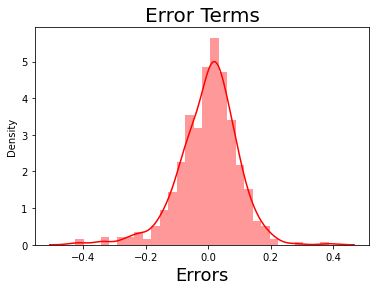

In [63]:
### Visualising the error terms

plt.title('Error Terms', fontsize = 20) 
sns.distplot(residual, color='red')
plt.xlabel('Errors', fontsize = 18) 
plt.show()

**We can see Error terms are normally distributed**

### <font color=blue> 7. Prediction and Evaluation on Test set:</font>

Applying Rescaling on Test data set

In [64]:
### Ceating a list of numeric variables

nums = ['temp', 'humidity', 'windspeed', 'count']

In [65]:
### Fit on Data

df_test[nums] = scaler.transform(df_test[nums])
df_test.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Cloudy,Light Snow,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.817246,0.314298,0.537414,0.569029


#### <font color=blue> Dividing into X_test and y_test: </font>

In [66]:
### Diving the data set

y_test = df_test.pop('count')
X_test = df_test

In [67]:
X_test.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Tue,Wed,Cloudy,Light Snow,year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.122727,0.159091,0.318182,0.027273,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.328872,0.366595,0.466833,0.163248,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


**Note:** All the features of Test data are scaled betweeen 0 and 1.

In [68]:
### Columns from Linear model:

X_train_5.columns

Index(['spring', 'summer', 'winter', 'July', 'Sep', 'Cloudy', 'Light Snow',
       'year', 'holiday', 'temp'],
      dtype='object')

In [69]:
### Lets use our model to make prediction

### Creating a new X_test dataframe by dropping variable:

X_test = X_test[X_train_5.columns]

In [70]:
### adding a constant variables

X_test_1 = sm.add_constant(X_test)
X_test_1.head()

,const,spring,summer,winter,July,Sep,Cloudy,Light Snow,year,holiday,temp
184,1.0,0,0,0,1,0,1,0,0,1,0.831783
535,1.0,0,1,0,0,0,0,0,1,0,0.901354
299,1.0,0,0,1,0,0,1,0,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,1,0,0,0,0,0,0,0,0.817246


In [71]:
### Making a prediction

y_pred = lm_5.predict(X_test_1)

#### <font color=blue> R-square and adjusted-R square for Test data set: </font>

In [72]:
### Evaluate R square for test data set

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8092660294132242

**Note:** It is Excellent R-square value for a model

#### <font color=blue> Model Evaluation: </font>

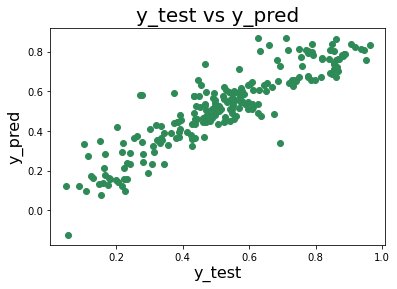

In [73]:
### Plotting y_test and y_pred for data variance

plt.title('y_test vs y_pred', fontsize=20)  
plt.scatter(y_test,y_pred,color='seagreen')
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)
plt.show()

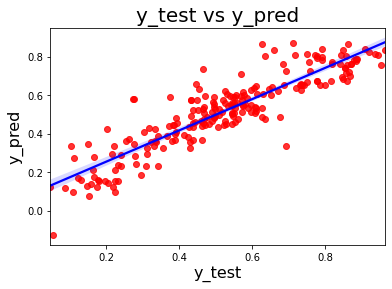

In [74]:
### Checking with Regression plot

plt.title('y_test vs y_pred', fontsize=20)
sns.regplot(x=y_test, y=y_pred, fit_reg=True, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.xlabel('y_test', fontsize=16) 
plt.ylabel('y_pred', fontsize=16)  
plt.show()

In [75]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.71e-181
Time:                        17:55:47   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1501      0.029      5.124      0.0

**Note:** Regression line best fit on data variance

**Equation of our best fitted line is:**

### <font color = red> count = 0.5029 * temp + 0.2326 * year + 0.0812 * september + 0.0829 * winter + 0.0367 * summer - 0.0766 * spring - 0.0523 * july - 0.0785 * cloudy - 0.2989 * light snow - 0.1003 * holiday </font>

**FINAL RESULT**

    - TRAIN R_SQUARE = 82.4%
    
    - TRAIN ADJ. R_SQUARE = 82%
    
    - TEST R_SQUARE = 80.9%
    
### <font color = green> Yes. It seems to be a best linear model. </font>
    